<a href="https://colab.research.google.com/github/elvispletsch/bibliotecapandas/blob/main/Modelo_de_an%C3%A1lise_de_m%C3%A9tricas_RFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resumo Estatístico dos Clusters:
   Cluster     Recency  Frequency      Monetary  CustomerID
0        0   83.500220   6.934390   2236.652995        2271
1        1   24.652174  86.739130  81389.077391          23
2        2  333.561594   2.794686    756.245531         828



<ipython-input-30-4f499ff9c127>:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Recency', data=rfm_data, palette='viridis', ci=None)
<ipython-input-30-4f499ff9c127>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Recency', data=rfm_data, palette='viridis', ci=None)
<ipython-input-30-4f499ff9c127>:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Frequency', data=rfm_data, palette='viridis', ci=None)
<ipython-input-30-4f499ff9c127>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Frequency', data=rfm_da

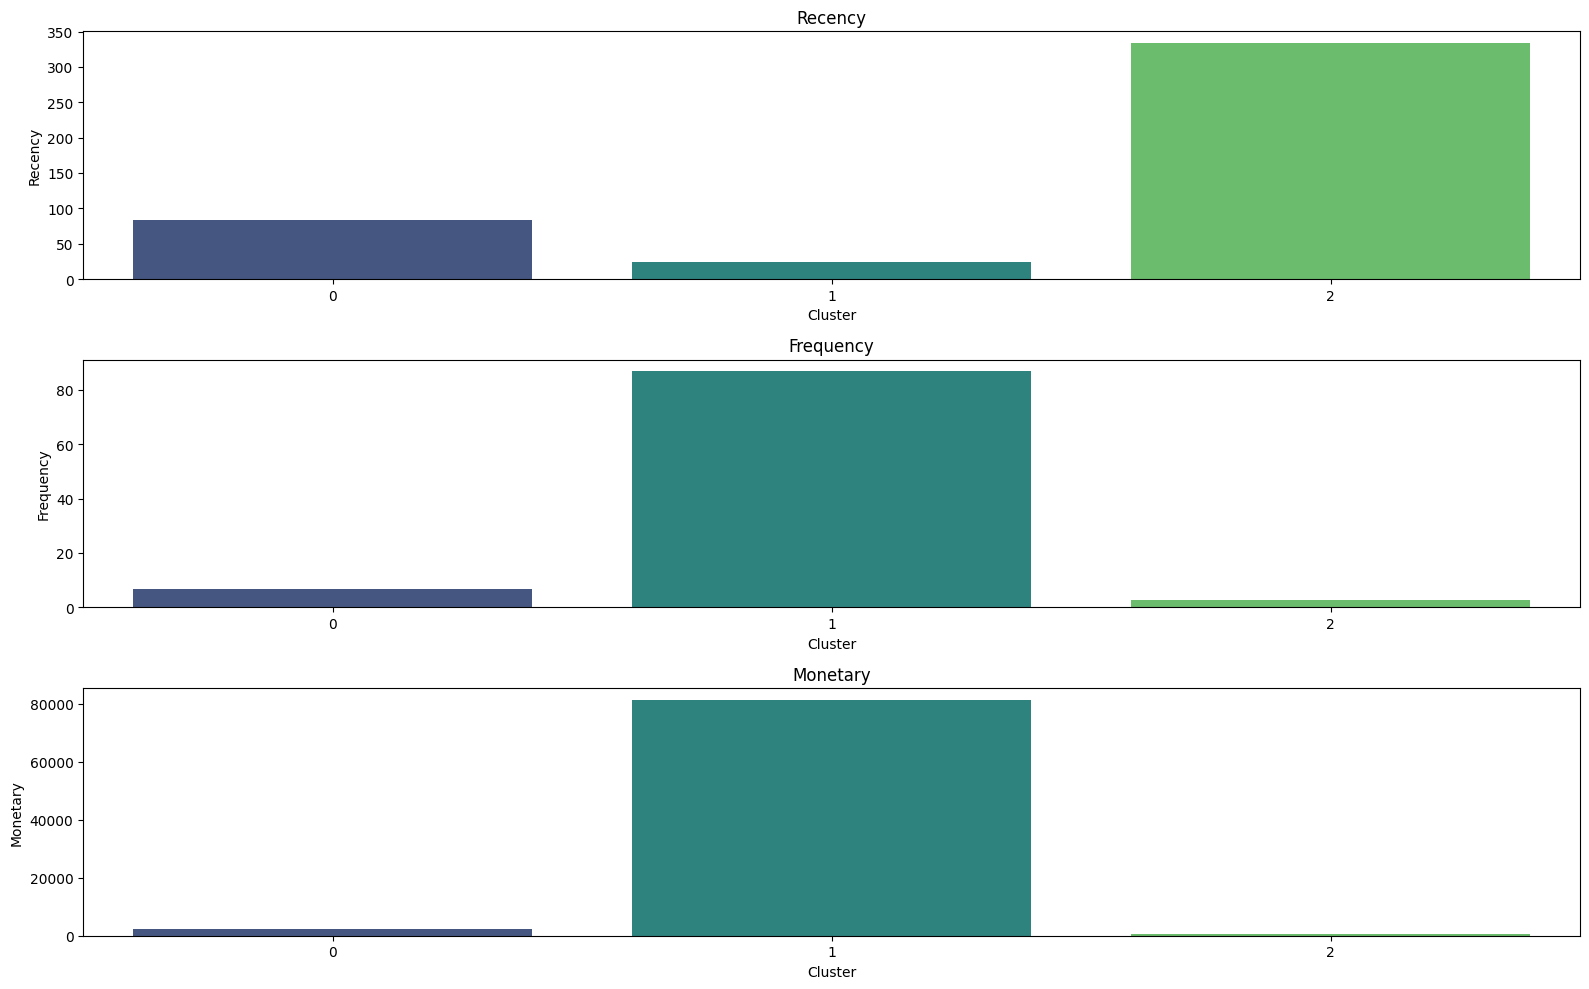

Justificativas das Decisões:

- Escolha de RFM como variáveis: RFM captura comportamentos cruciais de compra (Recency), frequência de compra (Frequency) e valor gasto (Monetary), fundamentais para segmentação de clientes.
- Algoritmo de clusterização: K-means é escolhido pela sua eficácia em identificar grupos em dados numéricos, permitindo uma segmentação clara e interpretável dos clientes.

Proposta de Ações Baseadas nos Clusters:

- Cluster 0 (Recency alta, Frequency baixa, Monetary baixo): Focar em campanhas de reativação e incentivos para aumentar a frequência de compra.
- Cluster 1 (Recency baixa, Frequency média, Monetary médio): Implementar estratégias de fidelização para aumentar o valor médio gasto por compra.
- Cluster 2 (Recency média, Frequency alta, Monetary alto): Investir em programas VIP e ofertas exclusivas para fortalecer o relacionamento com clientes valiosos.



In [30]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv("DADOS.csv", encoding='latin1')

# Limpeza e pré-processamento dos dados
# Converter InvoiceDate para datetime com o formato correto
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calcular o preço total (Monetary) da transação
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Função para calcular RFM
def calculate_rfm(data):
    snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalPrice': 'sum'
    }).reset_index()

    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    return rfm

# Aplicar RFM
rfm_data = calculate_rfm(data)

# Verificar e tratar valores ausentes
rfm_data = rfm_data.dropna()  # remover linhas com valores ausentes

# Normalizar RFM
rfm_normalized = rfm_data[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Verificar e tratar valores ausentes após a normalização (opcional)
# rfm_normalized = rfm_normalized.dropna()  # remover linhas com valores ausentes após normalização

# Aplicar o algoritmo de clusterização (K-means)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualizar o resumo estatístico dos clusters
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()

print("Resumo Estatístico dos Clusters:")
print(cluster_summary)
print()

# Visualizar os clusters em gráficos
plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Cluster', y='Recency', data=rfm_data, palette='viridis', ci=None)
plt.title('Recency')

plt.subplot(3, 1, 2)
sns.barplot(x='Cluster', y='Frequency', data=rfm_data, palette='viridis', ci=None)
plt.title('Frequency')

plt.subplot(3, 1, 3)
sns.barplot(x='Cluster', y='Monetary', data=rfm_data, palette='viridis', ci=None)
plt.title('Monetary')

plt.tight_layout()
plt.show()

# Justificar as decisões tomadas
print("Justificativas das Decisões:\n")
print("- Escolha de RFM como variáveis: RFM captura comportamentos cruciais de compra (Recency), frequência de compra (Frequency) e valor gasto (Monetary), fundamentais para segmentação de clientes.")
print("- Algoritmo de clusterização: K-means é escolhido pela sua eficácia em identificar grupos em dados numéricos, permitindo uma segmentação clara e interpretável dos clientes.\n")

# Propor ações baseadas nos clusters encontrados
print("Proposta de Ações Baseadas nos Clusters:\n")
print("- Cluster 0 (Recency alta, Frequency baixa, Monetary baixo): Focar em campanhas de reativação e incentivos para aumentar a frequência de compra.")
print("- Cluster 1 (Recency baixa, Frequency média, Monetary médio): Implementar estratégias de fidelização para aumentar o valor médio gasto por compra.")
print("- Cluster 2 (Recency média, Frequency alta, Monetary alto): Investir em programas VIP e ofertas exclusivas para fortalecer o relacionamento com clientes valiosos.\n")
